<a href="https://colab.research.google.com/github/Ash-bot19/Stock-Price-Movement-Prediction/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import sklearn.metrics as metrics

df = yf.download("AAPL", start="2018-01-01", end="2025-01-01")
# Drop the second level of column headers (ticker level)
df.columns = df.columns.get_level_values(0)

# Now check the updated columns
print(df.columns)
print(df.head())

df.describe()

/tmp/ipython-input-2359397032.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Price           Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.381001  40.390379  39.677744  39.888723  102223600
2018-01-03  40.373966  40.917820  40.310676  40.444293  118071600
2018-01-04  40.561497  40.664642  40.338800  40.446630   89738400
2018-01-05  41.023308  41.110042  40.566192  40.657615   94640000
2018-01-08  40.870941  41.166308  40.772482  40.870941   82271200


Price,Close,High,Low,Open,Volume
count,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,121.968483,123.178188,120.621658,121.846627,1.001417e+08
std,59.175667,59.645820,58.613171,59.103899,5.521309e+07
min,33.832439,34.672361,33.787231,34.258347,2.323470e+07
25%,54.146660,54.849629,53.760164,54.331938,6.309290e+07
50%,131.554672,133.043658,130.189052,132.018137,8.671200e+07
75%,168.815567,170.374422,167.378021,168.628187,1.214346e+08
max,258.103729,259.179926,256.718662,257.276679,4.265100e+08


In [3]:
df.isnull().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0


EDA

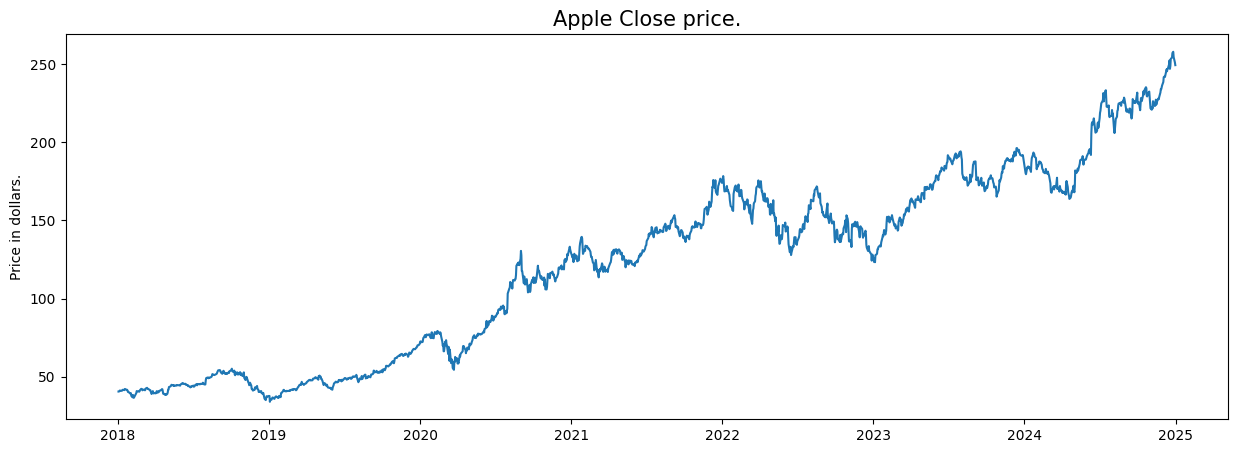

In [4]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Apple Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,40.381001,40.390379,39.677744,39.888723,102223600
2018-01-03,40.373966,40.917820,40.310676,40.444293,118071600
2018-01-04,40.561497,40.664642,40.338800,40.446630,89738400
2018-01-05,41.023308,41.110042,40.566192,40.657615,94640000
2018-01-08,40.870941,41.166308,40.772482,40.870941,82271200


display OHLC data

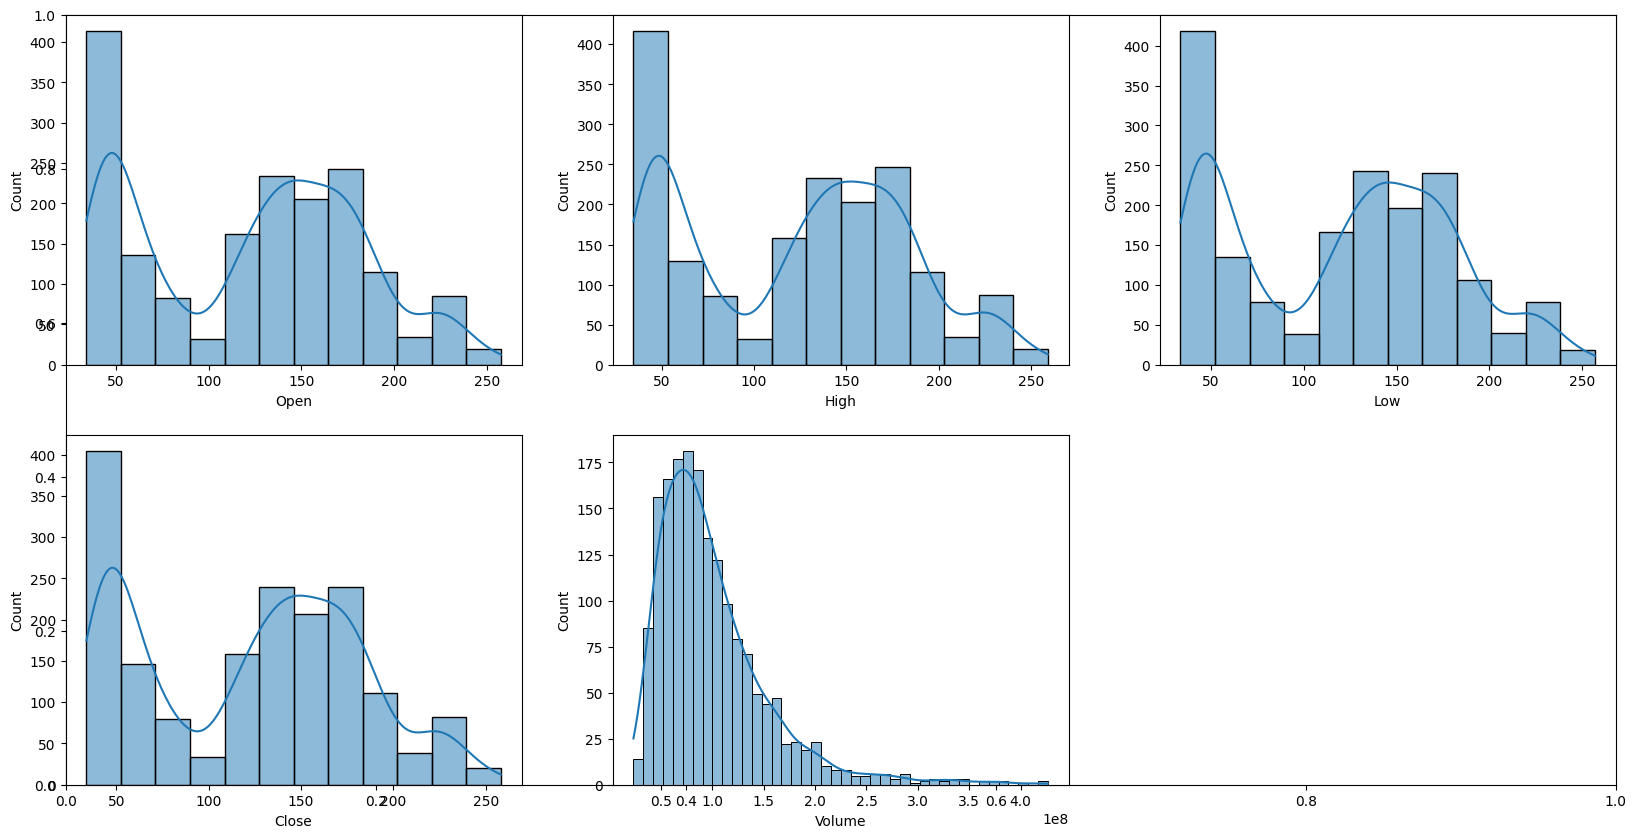

In [6]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(df[col], kde=True)
plt.show()

Boxdata

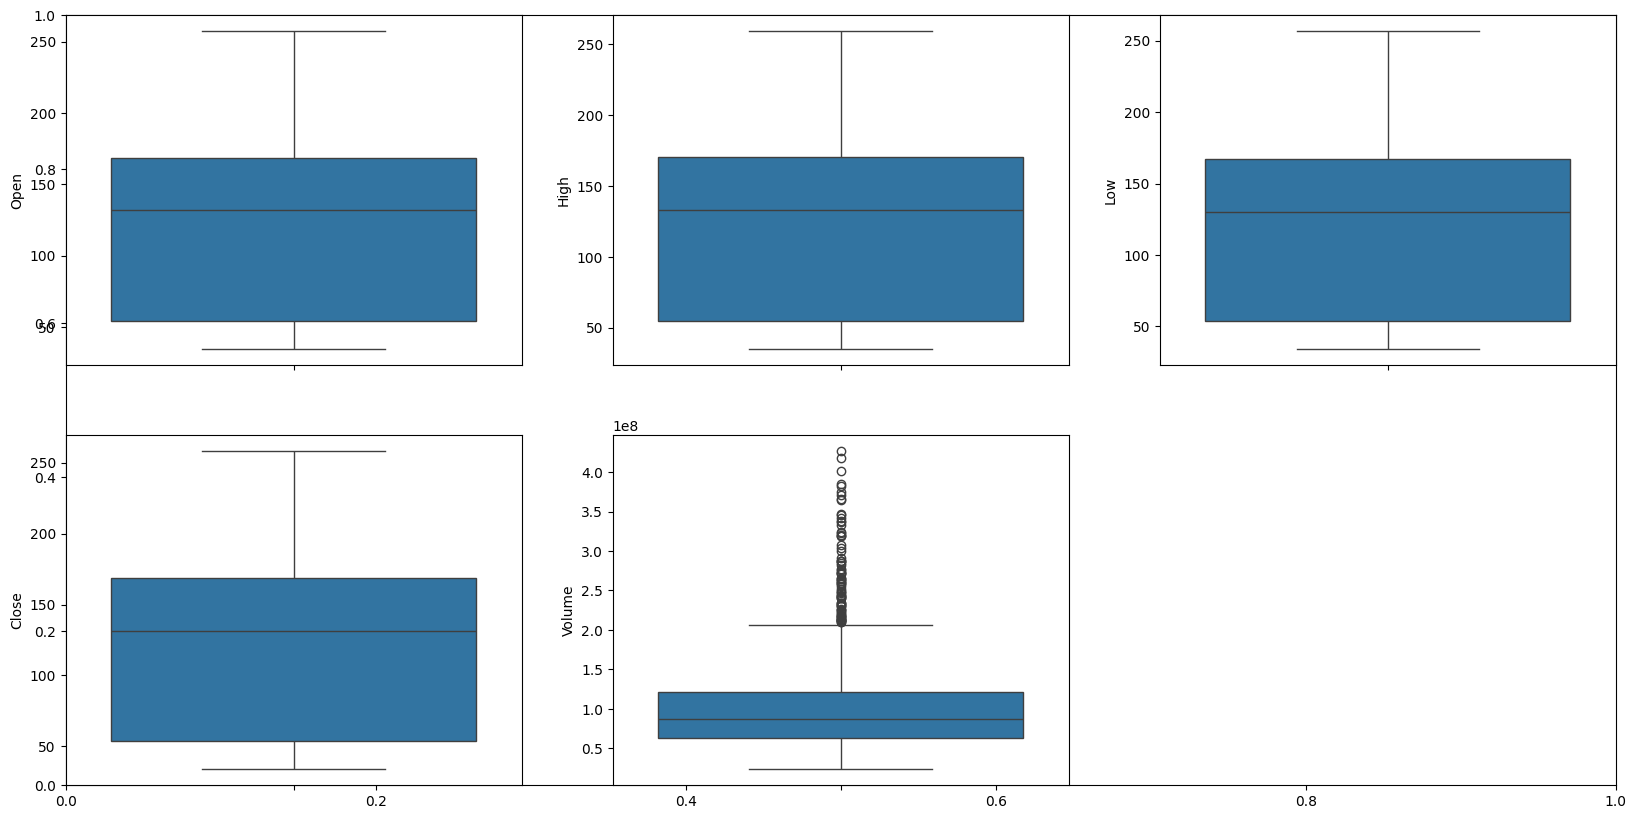

In [7]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

Adding features

In [8]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

display(df.head())

Price,Close,High,Low,Open,Volume,day,month,year
Date,,,,,,,,
2018-01-02,40.381001,40.390379,39.677744,39.888723,102223600,2,1,2018
2018-01-03,40.373966,40.917820,40.310676,40.444293,118071600,3,1,2018
2018-01-04,40.561497,40.664642,40.338800,40.446630,89738400,4,1,2018
2018-01-05,41.023308,41.110042,40.566192,40.657615,94640000,5,1,2018
2018-01-08,40.870941,41.166308,40.772482,40.870941,82271200,8,1,2018


In [9]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

Price,Close,High,Low,Open,Volume,day,month,year,is_quarter_end
Date,,,,,,,,,
2018-01-02,40.381001,40.390379,39.677744,39.888723,102223600,2,1,2018,0
2018-01-03,40.373966,40.917820,40.310676,40.444293,118071600,3,1,2018,0
2018-01-04,40.561497,40.664642,40.338800,40.446630,89738400,4,1,2018,0
2018-01-05,41.023308,41.110042,40.566192,40.657615,94640000,5,1,2018,0
2018-01-08,40.870941,41.166308,40.772482,40.870941,82271200,8,1,2018,0


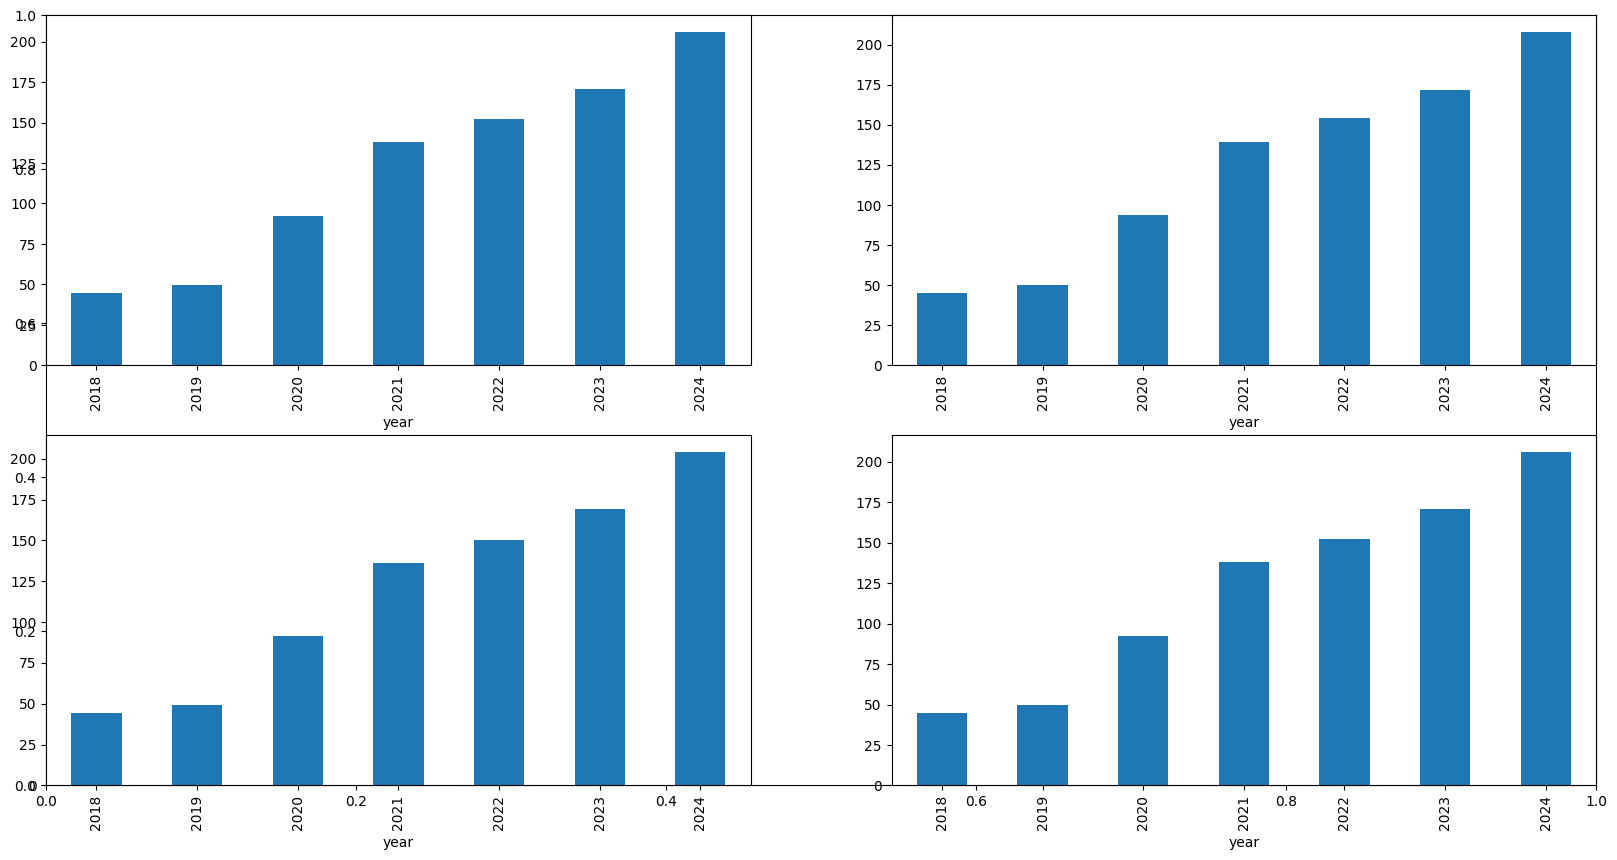

In [10]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [11]:
df.groupby('is_quarter_end').mean()

Price,Close,High,Low,Open,Volume,day,month,year
is_quarter_end,,,,,,,,
0,120.919288,122.055064,119.600009,120.754324,9.654854e+07,15.715503,6.093697,2020.994889
1,124.066872,125.424438,122.664956,124.031233,1.073279e+08,15.751278,7.436116,2021.005111


In [13]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let's check whether the target is balanced or not using a pie chart.

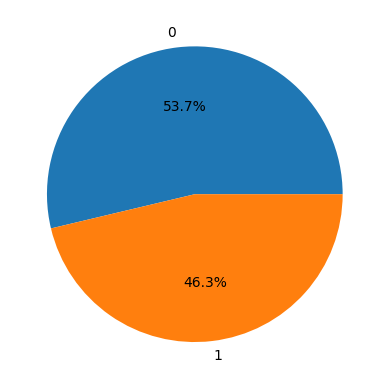

In [14]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

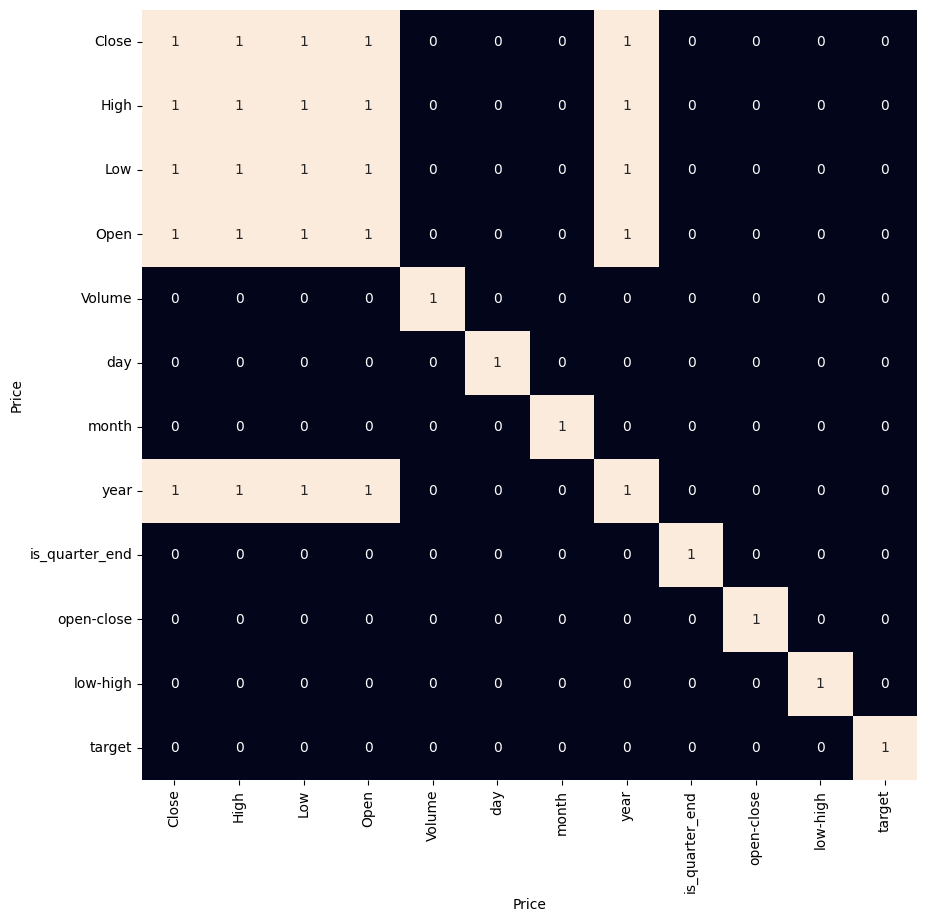

In [18]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

Data splitting and normalization

In [20]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1584, 3) (177, 3)


Model development and evaluation

In [21]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5129991035101027
Validation Accuracy :  0.4855350742447516

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5229791690388634
Validation Accuracy :  0.45878136200716846

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Train

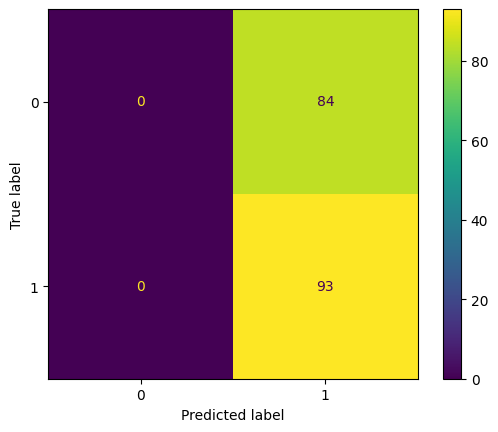

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()